## Transcriptions `Analyzer`

In [1]:
# %pip install matplotlib
# %pip install sqlite3
#%pip install plotly
#%pip install pandas
#%pip install nbformat


In [2]:
import sqlite3
import matplotlib.pyplot as plt

In [3]:
# Connect to the database
conn = sqlite3.connect('transcriptions.db')
cursor = conn.cursor()

In [4]:
# Query the database 
cursor.execute('SELECT issue_category FROM transcriptions')
results = cursor.fetchall()

In [5]:
# Process the data
category_counts = {}
for result in results:
    category = result[0]
    category_counts[category] = category_counts.get(category, 0) + 1

In [6]:
# Draw the pie chart
labels = category_counts.keys()
sizes = category_counts.values()

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/wambugumuchemi/Projects

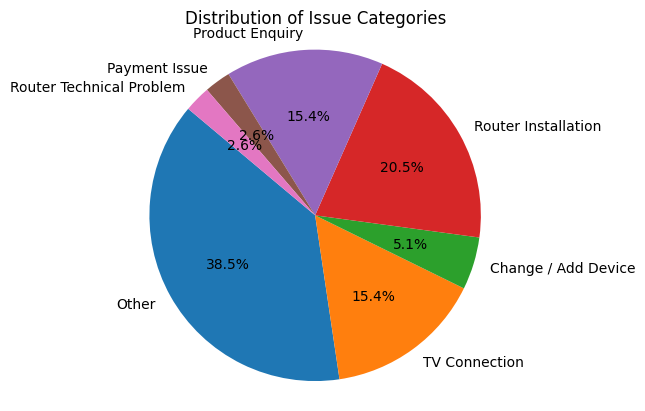

In [7]:
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Issue Categories')
plt.show()

### We can also use <span style="color:turquoise;">PLOTLY</span> to visualize the data


In [8]:
# Create a pie chart using Plotly
import plotly.express as px
import pandas

labels = list(category_counts.keys())
values = list(category_counts.values())
fig = px.pie(labels=labels, values=values, title='Distribution of Issue Categories')
#fig.update_layout(renderer="notebook")
fig.write_html('plotly_chart.html')
fig.show()


In [9]:
# Close the database connection
conn.close()

### Visualize issues reported per day.

In [10]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('transcriptions.db')
query = "SELECT DATE(date), issue_category, COUNT(*) AS count FROM transcriptions WHERE issue_category IS NOT NULL GROUP BY DATE(date), issue_category"
df = pd.read_sql_query(query, conn)



In [11]:

df_pivot = df.pivot(index='DATE(date)', columns='issue_category', values='count').fillna(0)
print (df_pivot)


issue_category  Change / Add Device  Other  Payment Issue  Product Enquiry  \
DATE(date)                                                                   
2023-10-23                      0.0    5.0            0.0              0.0   
2023-10-24                      1.0    9.0            0.0              0.0   
2023-10-25                      0.0    0.0            1.0              2.0   
2023-10-26                      1.0    1.0            0.0              3.0   
2023-10-27                      0.0    0.0            0.0              1.0   

issue_category  Router Installation  Router Technical Problem  TV Connection  
DATE(date)                                                                    
2023-10-23                      0.0                       0.0            1.0  
2023-10-24                      1.0                       0.0            2.0  
2023-10-25                      4.0                       0.0            2.0  
2023-10-26                      3.0                       

#### Matplotlib

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() 

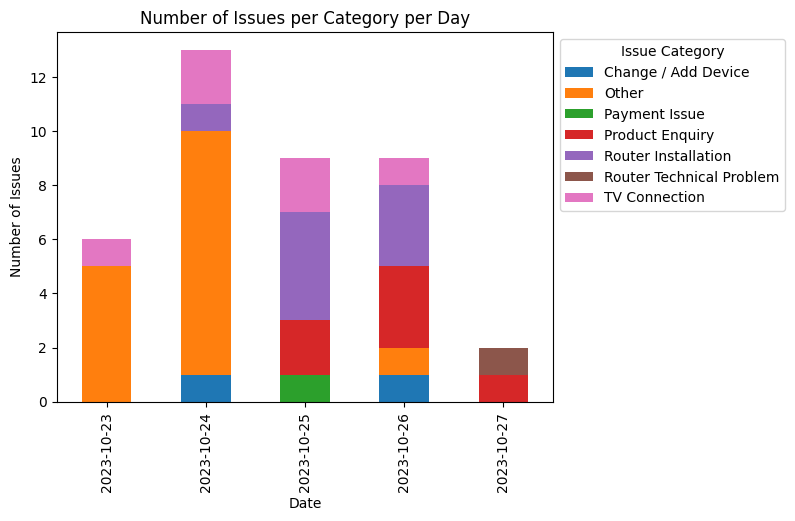

In [12]:
import matplotlib.pyplot as plt

df_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Date')
plt.ylabel('Number of Issues')
plt.title('Number of Issues per Category per Day')
plt.legend(title='Issue Category', bbox_to_anchor=(1, 1))
plt.show()


#### Plotly

In [13]:
import plotly.express as px

fig = px.bar(df, x='DATE(date)', y='count', color='issue_category', title='Number of Issues per Category per Day')
fig.show()

#### Seaborn

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() 

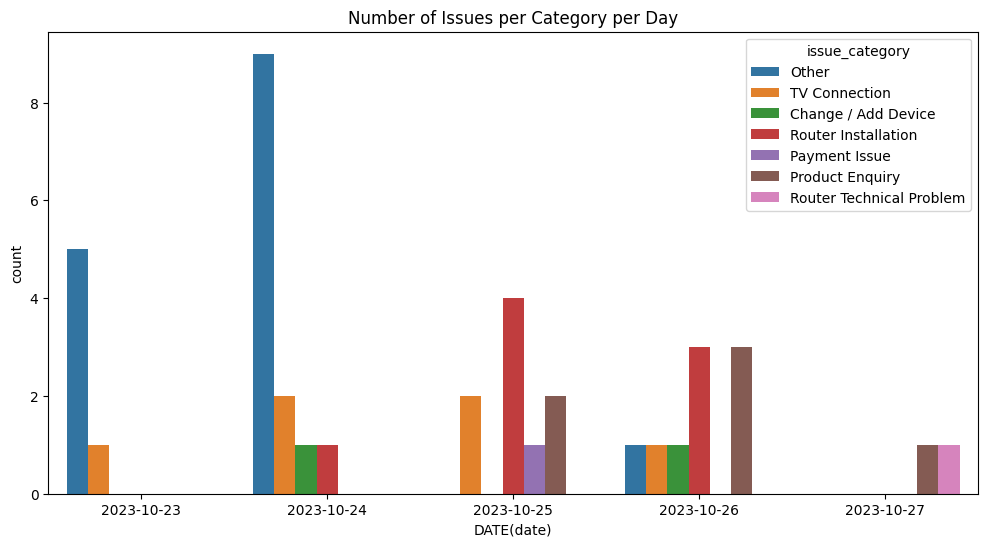

In [14]:
#%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_pivot is already created
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='DATE(date)', y='count', hue='issue_category')
plt.title('Number of Issues per Category per Day')
plt.show()


In [15]:
# %pip install altair
# %pip install bokeh
# %pip install pygal


#### Bokeh

In [16]:
from datetime import datetime
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource

# Convert 'date' to datetime if it's not already
df['date'] = pd.to_datetime(df['DATE(date)'])

source = ColumnDataSource(df)

plot = figure(x_axis_label='Date', y_axis_label='Count', title='Number of Issues per Category per Day')

plot.vbar(x='date', top='count', width=0.9, color='issue_category', source=source)

# Rotate x-axis labels for better visibility
plot.xaxis.major_label_orientation = "vertical"

show(plot)



In [17]:
import altair as alt
import pandas as pd

# Your data retrieval code
conn = sqlite3.connect('transcriptions.db')
query = "SELECT DATE(date) as date, issue_category, COUNT(*) AS count FROM transcriptions WHERE issue_category IS NOT NULL GROUP BY DATE(date), issue_category"
df = pd.read_sql_query(query, conn)

# Altair chart
chart = alt.Chart(df).mark_bar().encode(
    x='DATE(date):O',
    y='count:Q',
    color='issue_category:N',
).properties(
    title='Number of Issues per Category per Day'
).interactive()

# Save Altair chart as HTML
alt.renderers.set_embed_options(html=True)
chart.save('altair_chart.html')


#### Altair

In [18]:
import altair as alt

alt.Chart(df).mark_bar().encode(
    x='DATE(date):O',
    y='count:Q',
    color='issue_category:N',
).properties(
    title='Number of Issues per Category per Day'
).interactive()


alt.Chart(...)

#### Pygal

In [19]:
import pygal

line_chart = pygal.Bar(x_label_rotation=45, show_legend=False)
line_chart.title = 'Number of Issues per Category per Day'
line_chart.x_labels = df['DATE(date)']
for category in df['issue_category'].unique():
    line_chart.add(category, df[df['issue_category'] == category]['count'].tolist())

line_chart.render_to_file('issues_chart.svg')


KeyError: 'DATE(date)'